In [1]:
import glob
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline


In [3]:
pd.set_option('display.max_columns', 1000)

In [19]:
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [5]:
pre = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/"

In [31]:
savefigPre = "/Users/weilu/Dropbox/openAWSEM/figures/DNA-Protein-Qvalues/"

In [25]:
def get_energies(protein):
    # protein = "1a3q"
    all_energies=[]
    for i in range(5):
        e = f"{pre}/energy_{protein}_{i}_jun17"
        e=pandas.read_csv(e,index_col=0)
        e['Frame']=e.index
        e['Repetition']=i
        all_energies+=[e]
    all_energies=pandas.concat(all_energies)
    return all_energies

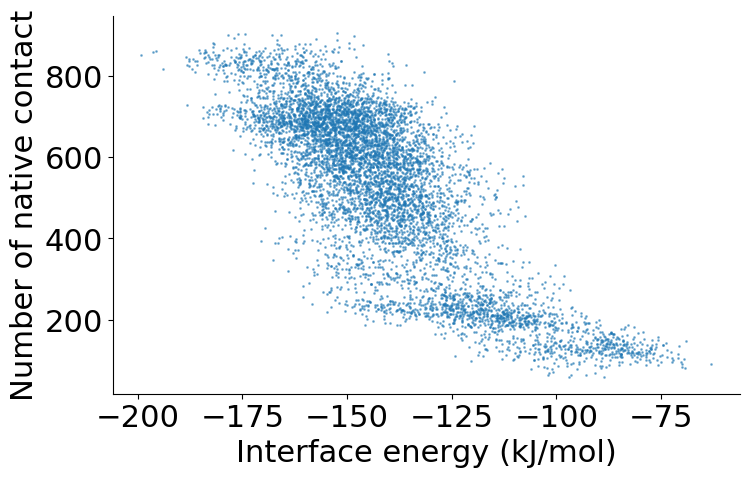

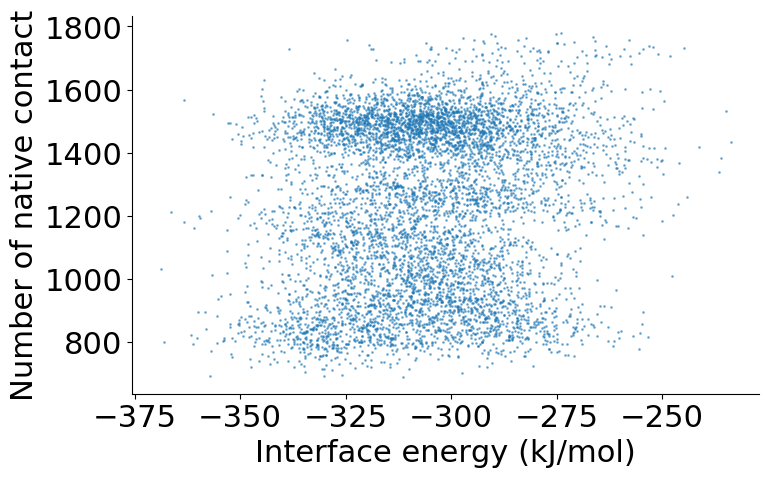

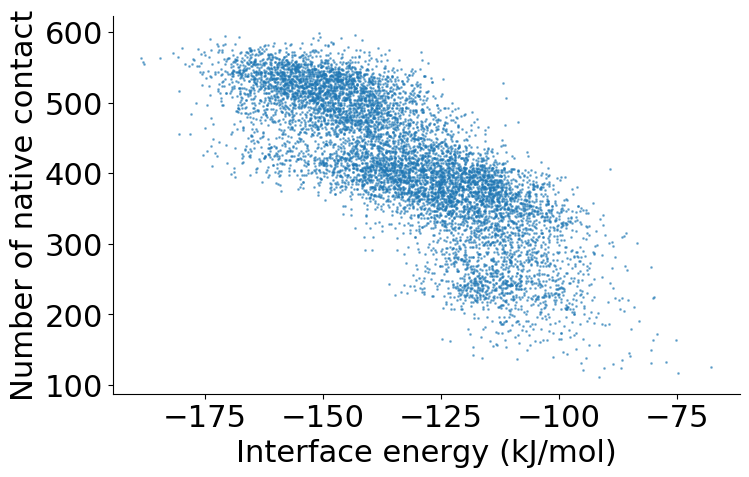

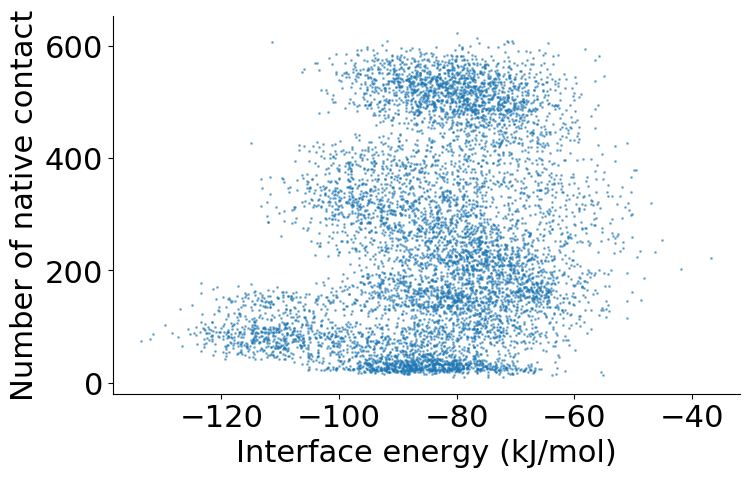

In [33]:
pdb_list = ["1a3q", "1a36", "1mnn", "6cta"]
for protein in pdb_list:
    all_energies = get_energies(protein)
    all_energies["interface_energy"]=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
    plt.figure()
    plt.scatter(all_energies["interface_energy"],all_energies['num_contact kJ/mol'],s=1,alpha=0.5)
    plt.xlabel('Interface energy (kJ/mol)')
    plt.ylabel('Number of native contact')
    # seaborn.despine()
    plt.savefig(f'{savefigPre}/{protein}_scatter.png')

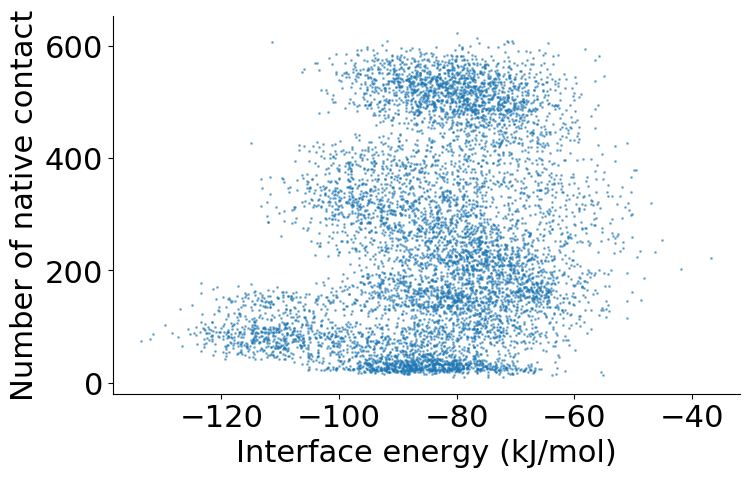

In [34]:
protein = "6cta"
all_energies = get_energies(protein)
all_energies["interface_energy"]=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
plt.figure()
plt.scatter(all_energies["interface_energy"],all_energies['num_contact kJ/mol'],s=1,alpha=0.5)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Number of native contact')
# plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
# plt.ylim(0,1)
# plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
seaborn.despine()

In [35]:
all_energies

,Angle kJ/mol,BasePair kJ/mol,Bond kJ/mol,Chain kJ/mol,Chi kJ/mol,Connectivity kJ/mol,CrossStacking kJ/mol,Dihedral kJ/mol,Electrostatics kJ/mol,ElectrostaticsProteinDNA kJ/mol,Excl kJ/mol,Exclusion kJ/mol,ExclusionProteinDNA kJ/mol,Q_protein kJ/mol,Q_value_sigma3,Q_value_sigma5,Stacking kJ/mol,TotalEnergy kJ/mol,beta1 kJ/mol,beta2 kJ/mol,beta3 kJ/mol,contact kJ/mol,fm kJ/mol,num_contact kJ/mol,pap1 kJ/mol,pap2 kJ/mol,rama kJ/mol,rama_pro kJ/mol,Q_value_sym_sigma5,Q_value_sym_sigma3,Q_value_sym_sigma1,Frame,Repetition,interface_energy
0,130.400894,-184.970673,66.462013,3718.438477,3718.438477,3718.438477,-37.696594,-317.107758,14.550714,-38.956024,3718.438477,2.188708,-29.049599,0.812267,0.865570,0.946042,-273.518463,-10202.900391,-489.271240,-489.271240,-489.271240,-3218.645996,-7007.806641,574.0,-116.094604,-116.094604,-2998.447754,-2998.447754,0.952114,0.879198,0.493916,0,0,-68.005623
1,113.189583,-153.431091,51.472740,3500.880127,3500.880127,3500.880127,-31.933699,-312.190308,14.558769,-39.899467,3500.880127,1.333276,-23.478230,0.745346,0.779540,0.902576,-288.565002,-10820.977539,-510.415588,-510.415588,-510.415588,-3330.761963,-7062.785156,531.0,-121.438995,-121.438995,-3160.939941,-3160.939941,0.932576,0.838674,0.468581,1,0,-63.377697
2,139.336029,-144.603180,57.211441,3318.021973,3318.021973,3318.021973,-29.225704,-307.088043,14.639368,-35.904663,3318.021973,0.705275,-27.473330,0.707566,0.797810,0.911221,-291.234009,-10915.570312,-506.772644,-506.772644,-506.772644,-3321.521484,-7138.791992,538.0,-112.715324,-112.715324,-3070.571777,-3070.571777,0.929312,0.834879,0.460128,2,0,-63.377993
3,101.487778,-164.680817,53.612015,3580.560059,3580.560059,3580.560059,-33.864117,-298.700439,14.858055,-38.395325,3580.560059,0.018381,-25.824692,0.721958,0.766418,0.892694,-321.802429,-10930.022461,-542.265259,-542.265259,-542.265259,-3285.000488,-7164.403809,523.0,-120.982674,-120.982674,-3210.020508,-3210.020508,0.908946,0.793075,0.395041,3,0,-64.220017
4,105.525757,-185.781677,48.546173,3558.740967,3558.740723,3558.740967,-36.016857,-310.654602,14.561738,-40.342056,3558.740967,0.866784,-21.100855,0.701189,0.769064,0.897975,-306.092957,-10700.472656,-512.303833,-512.303833,-512.303833,-3331.443115,-7014.306641,540.0,-126.697739,-126.697739,-3086.342285,-3086.342285,0.927758,0.826241,0.416726,4,0,-61.442911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,136.613693,-188.651215,50.108368,3446.038574,3446.038574,3446.038574,-44.411072,-305.369049,15.046551,-63.605827,3446.038574,0.230468,-40.063034,0.498315,0.087954,0.152864,-302.787903,-11921.629883,-628.505615,-628.505615,-628.505615,-3690.998047,-7053.683594,67.0,-132.004120,-132.004120,-3187.327148,-3187.327148,0.718987,0.523304,0.164740,1592,4,-103.668861
1593,122.107178,-174.866760,32.539127,3298.401855,3298.401855,3298.401855,-39.033661,-305.049652,15.220125,-62.645119,3298.401855,0.969658,-43.851570,0.491584,0.083782,0.147296,-275.582275,-11924.316406,-598.937988,-598.937988,-598.937988,-3585.007324,-7073.951172,66.0,-131.873840,-131.873840,-3169.478027,-3169.478027,0.712058,0.517122,0.185915,1593,4,-106.496689
1594,64.190521,-174.832779,32.347885,3420.765137,3420.765137,3420.765137,-39.215046,-303.098022,16.081419,-70.597855,3420.765137,1.676184,-39.804733,0.515951,0.085844,0.152053,-271.812927,-11962.128906,-599.308960,-599.308960,-599.308960,-3608.840088,-7106.892578,66.0,-131.502167,-131.502167,-3218.038086,-3218.038086,0.697412,0.492213,0.141441,1594,4,-110.402588
1595,113.114601,-162.263062,53.617287,3304.629883,3304.629639,3304.629639,-41.909218,-305.629456,16.517086,-69.381645,3304.629639,0.389906,-44.151489,0.520116,0.092448,0.162424,-292.157593,-11984.453125,-566.401733,-566.401733,-566.401733,-3676.590820,-7069.371094,72.0,-124.875954,-124.875954,-3192.763428,-3192.763428,0.726638,0.532145,0.145840,1595,4,-113.533134


Text(0.5, 0.98, 'Protein-DNA Q value [PDBid:1a3q]')

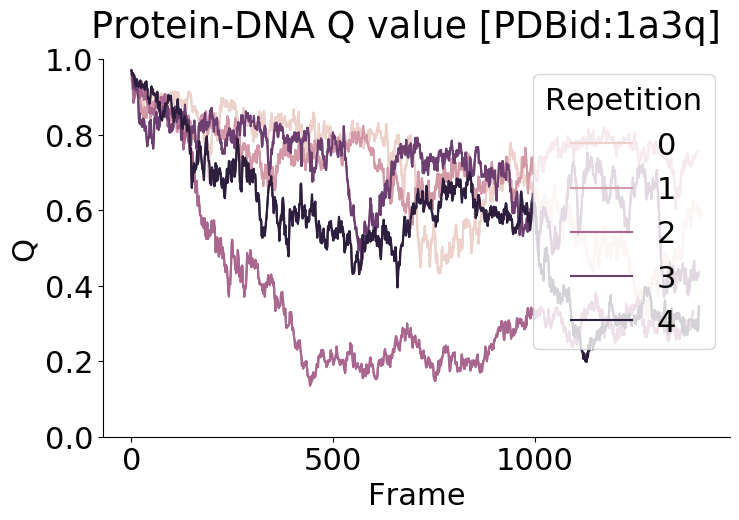

In [20]:
protein = "1a3q"
all_energies=[]
for i in range(5):
    e = f"{pre}/energy_{protein}_{i}_jun17"
    e=pandas.read_csv(e,index_col=0)
    e['Frame']=e.index
    e['Repetition']=i
    all_energies+=[e]
all_energies=pandas.concat(all_energies)
plt.figure()
seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition')
plt.legend([0,1,2,3,4])
pdb_name=pdb_file.split('/')[-1].split('_')[-4]
seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition',)
seaborn.despine()
plt.legend([0,1,2,3,4],title="Repetition",loc=1)
plt.ylabel("Q")
plt.ylim(0,1)
plt.suptitle(f'Protein-DNA Q value [PDBid:{pdb_name}]')

In [21]:
all_energies.columns

Index(['Angle kJ/mol', 'BasePair kJ/mol', 'Bond kJ/mol', 'Chain kJ/mol',
       'Chi kJ/mol', 'Connectivity kJ/mol', 'CrossStacking kJ/mol',
       'Dihedral kJ/mol', 'Electrostatics kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'Excl kJ/mol', 'Exclusion kJ/mol',
       'ExclusionProteinDNA kJ/mol', 'Q_protein kJ/mol', 'Q_value_sigma3',
       'Q_value_sigma5', 'Stacking kJ/mol', 'TotalEnergy kJ/mol',
       'beta1 kJ/mol', 'beta2 kJ/mol', 'beta3 kJ/mol', 'contact kJ/mol',
       'fm kJ/mol', 'num_contact kJ/mol', 'pap1 kJ/mol', 'pap2 kJ/mol',
       'rama kJ/mol', 'rama_pro kJ/mol', 'Q_value_sym_sigma5',
       'Q_value_sym_sigma3', 'Q_value_sym_sigma1', 'Frame', 'Repetition'],
      dtype='object')

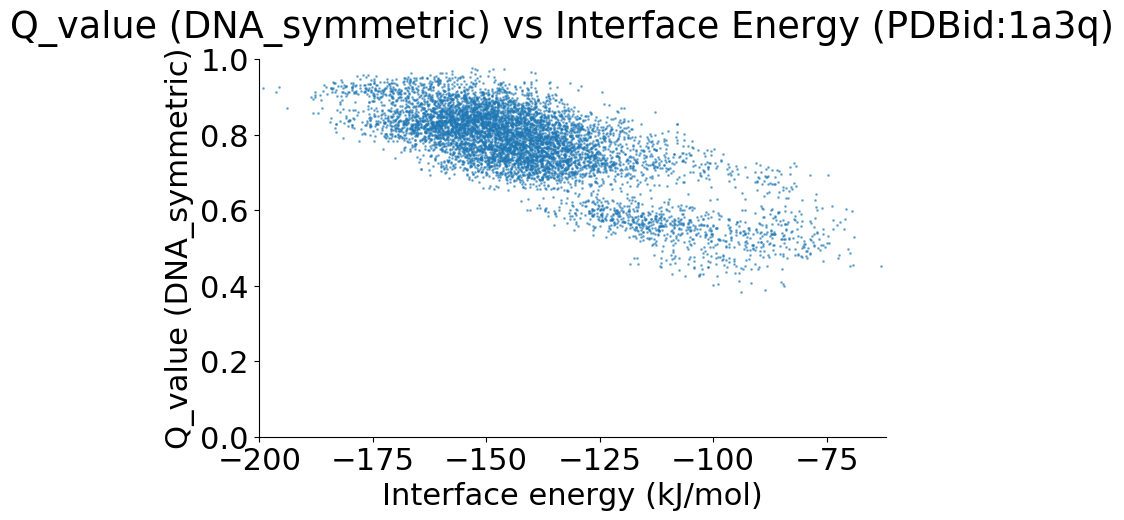

In [22]:
plt.figure()
plt.scatter(interface_energy,all_energies['Q_value_sym_sigma5'],s=1,alpha=0.5)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Q_value (DNA_symmetric)')
plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
# plt.ylim(0,1)
# plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
seaborn.despine()

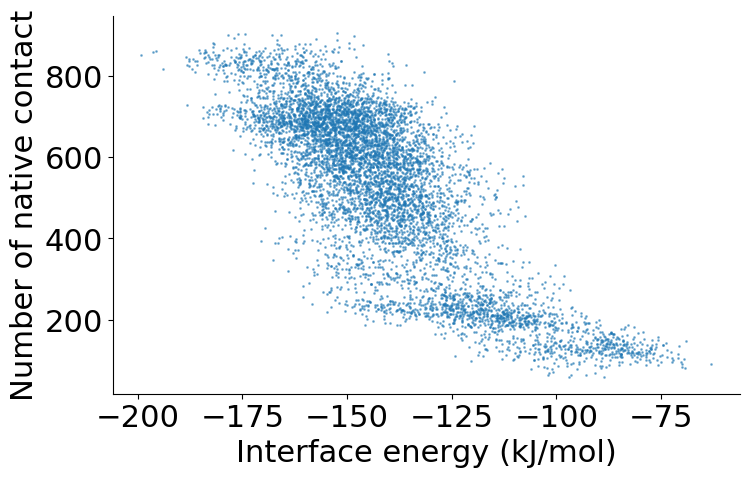

In [24]:

plt.figure()
plt.scatter(interface_energy,all_energies['num_contact kJ/mol'],s=1,alpha=0.5)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Number of native contact')
# plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
# plt.ylim(0,1)
# plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
seaborn.despine()

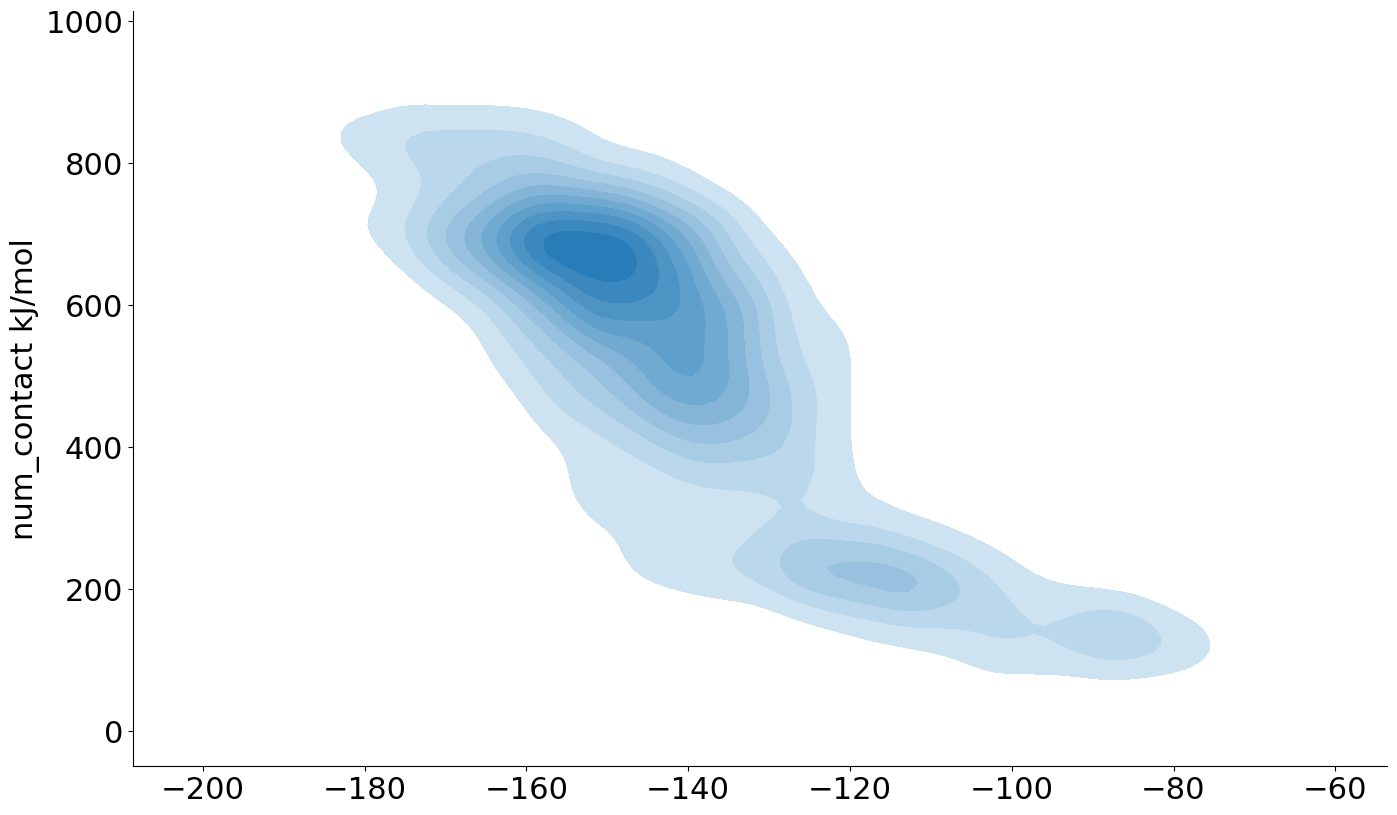

In [18]:
plt.figure()
interface_energy=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
seaborn.kdeplot(interface_energy,all_energies['num_contact kJ/mol'],shade=True,shade_lowest=False,n_levels=10)
# plt.xlabel('Interface energy (kJ/mol)')
# plt.ylabel('Q_value (DNA_symmetric)')
# plt.ylim(0,1)
# plt.xlim(interface_energy.min(),interface_energy.max())
# plt.suptitle(f'Q value vs Energy (PDBid:{pdb_name})')
seaborn.despine()

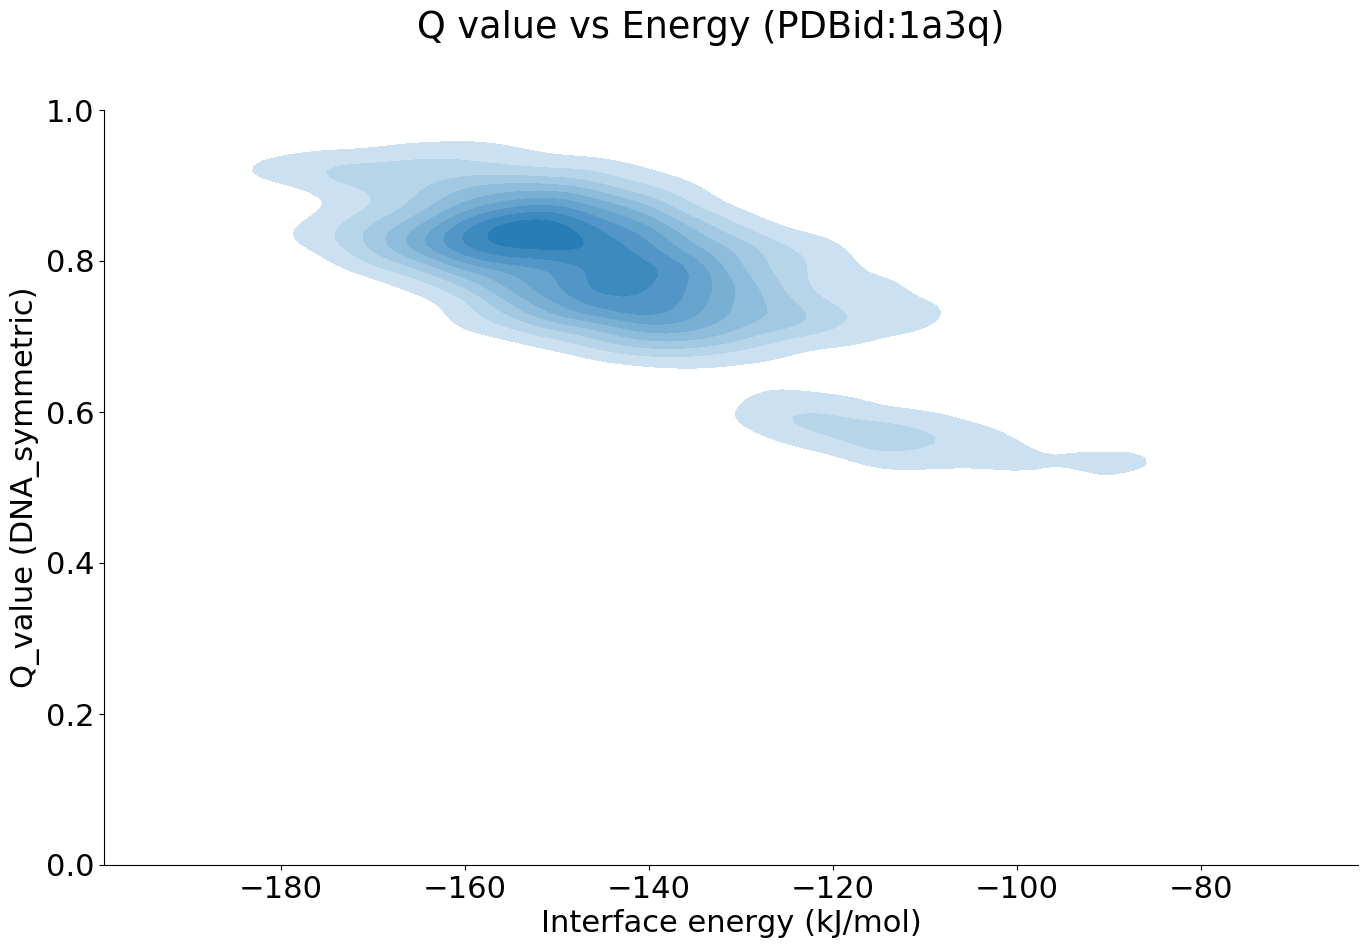

In [12]:
plt.figure()
interface_energy=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
seaborn.kdeplot(interface_energy,all_energies['Q_value_sym_sigma5'],shade=True,shade_lowest=False,n_levels=10)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Q_value (DNA_symmetric)')
plt.ylim(0,1)
plt.xlim(interface_energy.min(),interface_energy.max())
plt.suptitle(f'Q value vs Energy (PDBid:{pdb_name})')
seaborn.despine()

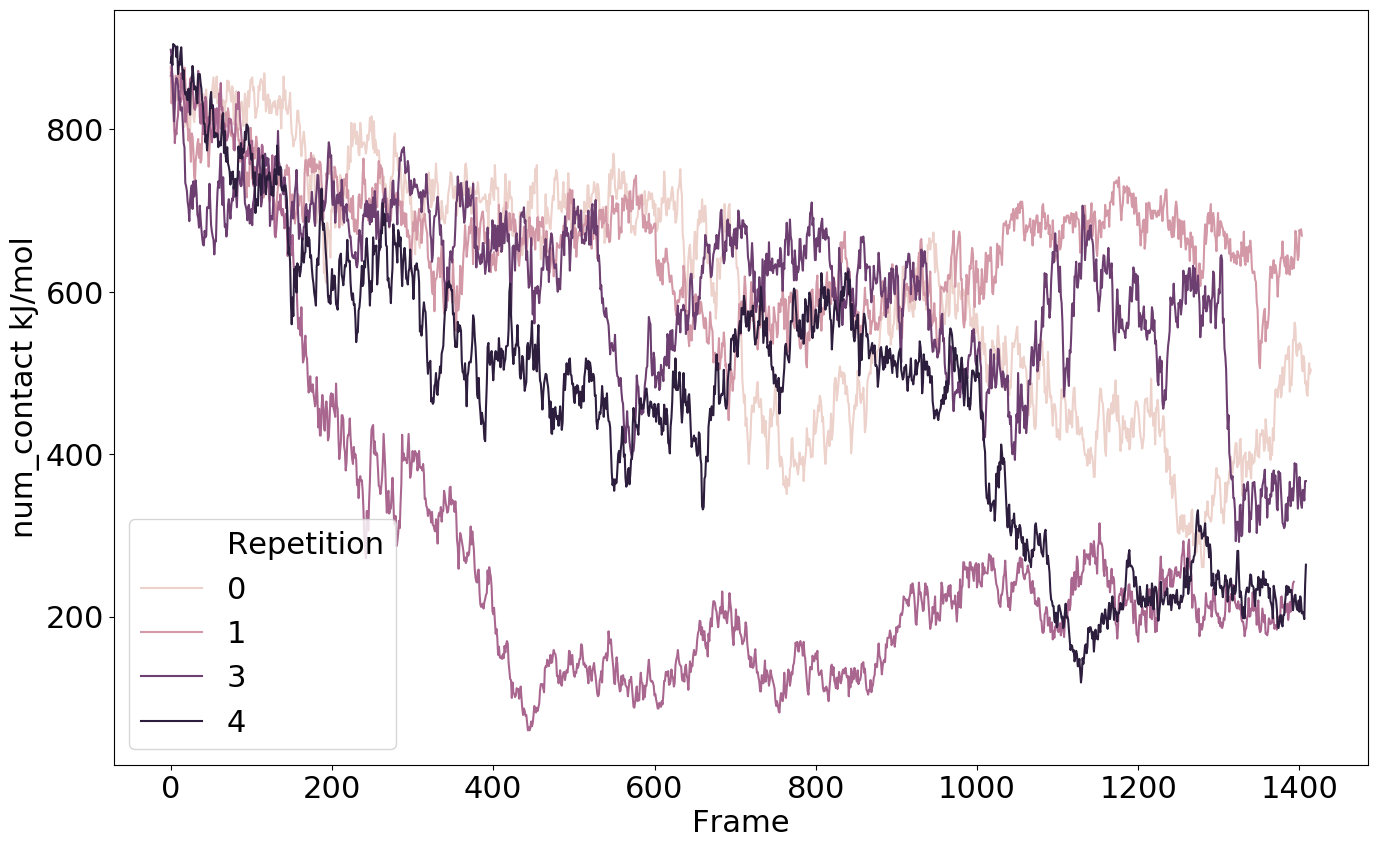

In [11]:
plt.figure()
seaborn.lineplot(data=all_energies,x='Frame',y='num_contact kJ/mol',hue='Repetition')


Text(0.5, 0.98, 'Protein-DNA Q value (DNA symmetric) [PDBid:1a3q]')

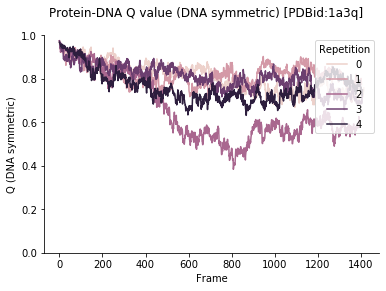

In [18]:
plt.figure()
seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sym_sigma5',hue='Repetition',)
seaborn.despine()
plt.legend([0,1,2,3,4],title="Repetition",loc=1)
plt.ylabel("Q (DNA symmetric)")
plt.ylim(0,1)
plt.suptitle(f'Protein-DNA Q value (DNA symmetric) [PDBid:{pdb_name}]')

Text(0.5, 0.98, 'Q values and Interface Energy (PDBid:1a3q, Repetition 0)')

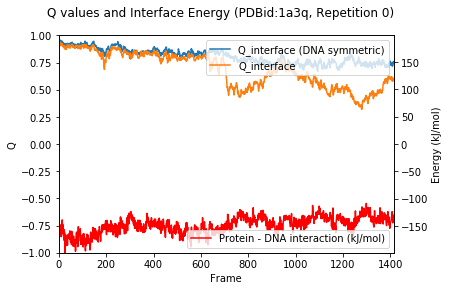

In [19]:
Rep0=all_energies[all_energies['Repetition']==0]
fig,ax=plt.subplots(1)
ax.plot(Rep0['Q_value_sym_sigma5'])
ax.plot(Rep0['Q_value_sigma5'])
#plt.plot(out2.sum(axis=0)/len(protein_contacts))
#plt.plot(all_energies['Q_value2 kJ/mol'])
#plt.plot(out3.sum(axis=0)/len(protein_contacts))
#plt.plot(all_energies['Q_value3 kJ/mol'])
ax.set_xlabel('Frame')
ax.set_ylabel('Q')
ax.set_ylim(-1,1)
ax.set_xlim(0,len(Rep0))
ax2=ax.twinx()
ax2.plot(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol'],'r')
minimum=(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol']).min()
ax2.set_ylim(minimum,-minimum)
ax.legend(['Q_interface (DNA symmetric)','Q_interface'],loc=1)
ax2.legend(['Protein - DNA interaction (kJ/mol)'],loc=4)
ax2.set_ylabel('Energy (kJ/mol)')
plt.suptitle(f'Q values and Interface Energy (PDBid:{pdb_name}, Repetition 0)')

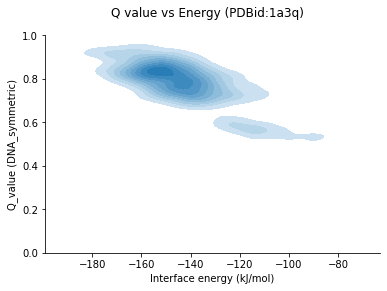

In [20]:
plt.figure()
interface_energy=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
seaborn.kdeplot(interface_energy,all_energies['Q_value_sym_sigma5'],shade=True,shade_lowest=False,n_levels=10)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Q_value (DNA_symmetric)')
plt.ylim(0,1)
plt.xlim(interface_energy.min(),interface_energy.max())
plt.suptitle(f'Q value vs Energy (PDBid:{pdb_name})')
seaborn.despine()

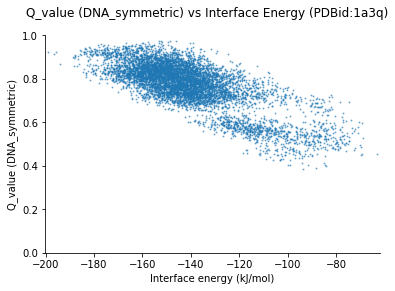

In [21]:
plt.figure()
plt.scatter(interface_energy,all_energies['Q_value_sym_sigma5'],s=1,alpha=0.5)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Q_value (DNA_symmetric)')
plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
plt.ylim(0,1)
plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
seaborn.despine()

In [ ]:

for dcd_file in glob.glob('/media/cab22/My Book/protein_DNA_selected_openmm/DNAProtein_Platform_OpenCL_date_20200226_pdb_*0_output.dcd'):
    pdb_file=dcd_file[:-12]+'0_clean.pdb'
    seq_file=dcd_file[:-12]+'0_protein.seq'
    trajectory_files=glob.glob(dcd_file[:-12]+'*.dcd')
    energy_files=glob.glob(dcd_file[:-12]+'*.csv')
    trajectory_files.sort()
    energy_files.sort()
    all_energies=[]
    for i,e in enumerate(energy_files):
        e=pandas.read_csv(e,index_col=0)
        e['Frame']=e.index
        e['Repetition']=i
        all_energies+=[e]
    all_energies=pandas.concat(all_energies)
    plt.figure()
    seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition')
    plt.legend([0,1,2,3,4])
    pdb_name=pdb_file.split('/')[-1].split('_')[-4]
    seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition',)
    seaborn.despine()
    plt.legend([0,1,2,3,4],title="Repetition",loc=1)
    plt.ylabel("Q")
    plt.ylim(0,1)
    plt.suptitle(f'Protein-DNA Q value [PDBid:{pdb_name}]')
    plt.savefig(f'{pdb_name}_fig1_Qvalue.png')
    plt.figure()
    seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sym_sigma5',hue='Repetition',)
    seaborn.despine()
    plt.legend([0,1,2,3,4],title="Repetition",loc=1)
    plt.ylabel("Q (DNA symmetric)")
    plt.ylim(0,1)
    plt.suptitle(f'Protein-DNA Q value (DNA symmetric) [PDBid:{pdb_name}]')
    plt.savefig(f'{pdb_name}_fig2_Qvaluesym.png')
    Rep0=all_energies[all_energies['Repetition']==0]
    fig,ax=plt.subplots(1)
    ax.plot(Rep0['Q_value_sym_sigma5'])
    ax.plot(Rep0['Q_value_sigma5'])
    #plt.plot(out2.sum(axis=0)/len(protein_contacts))
    #plt.plot(all_energies['Q_value2 kJ/mol'])
    #plt.plot(out3.sum(axis=0)/len(protein_contacts))
    #plt.plot(all_energies['Q_value3 kJ/mol'])
    ax.set_xlabel('Frame')
    ax.set_ylabel('Q')
    ax.set_ylim(-1,1)
    ax.set_xlim(0,len(Rep0))
    ax2=ax.twinx()
    ax2.plot(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol'],'r')
    minimum=(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol']).min()
    ax2.set_ylim(minimum,-minimum)
    ax.legend(['Q_interface (DNA symmetric)','Q_interface'],loc=1)
    ax2.legend(['Protein - DNA interaction (kJ/mol)'],loc=4)
    ax2.set_ylabel('Energy (kJ/mol)')
    plt.suptitle(f'Q values and Interface Energy (PDBid:{pdb_name}, Repetition 0)')
    plt.savefig(f'{pdb_name}_fig3_QandEnergy.png')
    plt.figure()
    interface_energy=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
    seaborn.kdeplot(interface_energy,all_energies['Q_value_sym_sigma5'],shade=True,shade_lowest=False,n_levels=10)
    plt.xlabel('Interface energy (kJ/mol)')
    plt.ylabel('Q_value (DNA_symmetric)')
    plt.ylim(0,1)
    plt.xlim(interface_energy.min(),interface_energy.max())
    plt.suptitle(f'Q value vs Energy (PDBid:{pdb_name})')
    seaborn.despine()
    plt.savefig(f'{pdb_name}_fig5_kde.png')
    plt.figure()
    plt.scatter(interface_energy,all_energies['Q_value_sym_sigma5'],s=1,alpha=0.5)
    plt.xlabel('Interface energy (kJ/mol)')
    plt.ylabel('Q_value (DNA_symmetric)')
    plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
    plt.ylim(0,1)
    plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
    seaborn.despine()
    plt.savefig(f'{pdb_name}_fig4_scatter.png')

In [33]:
import numpy as np
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure('X', "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb")
model = structure[0]

In [34]:
chain_start = 0
count = 0
proteinResidues = ['ALA', 'ASN', 'CYS', 'GLU', 'HIS', 'LEU', 'MET', 'PRO', 'THR', 'TYR', 'ARG', 'ASP', 'GLN', 'GLY', 'ILE', 'LYS', 'PHE', 'SER', 'TRP', 'VAL']
rnaResidues = ['A', 'G', 'C', 'U', 'I']
dnaResidues = ['DA', 'DG', 'DC', 'DT', 'DI']
removeDNAchains = True
for chain in model.get_chains():
    chain_start += count
    count = 0
    if removeDNAchains and np.alltrue([a.get_resname().strip() in dnaResidues for a in chain.get_residues()]):
        print(f"chain {chain.id} is a DNA chain. will be ignored for Q evaluation")
        continue
    print(chain)

chain A is a DNA chain. will be ignored for Q evaluation
chain B is a DNA chain. will be ignored for Q evaluation
<Chain id=C>


In [35]:
a = list(chain.get_residues())

In [36]:
b = a[0]

In [37]:
b.get_resname().strip()

'NGP'

In [102]:
from simtk.openmm.app import *
# from simtk.openmm import *
from simtk.unit import *

In [103]:
type(AWSEM_xml) == list

True

In [106]:

def compute_dis(pos1, pos2):
    dis = pos1 - pos2
    dis = dis.value_in_unit(nanometer)
    r = (dis[0]**2 + dis[1]**2 + dis[2]**2)**0.5
    return r
# def get_het_bonds_info(fileLocation="5x2r-openmmawsem.pdb", AWSEM_xml="awsem.xml", pre="./"):
fileLocation = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb"
AWSEM_xml = ["/Users/weilu/openmmawsem/awsem.xml", "/Users/weilu/open3spn2/open3SPN2/3SPN2.xml"]
pdb = PDBFile(fileLocation)

res_list = list(pdb.topology.residues())
atom_list = list(pdb.topology.atoms())
protein_resNames = ["NGP", "IGL", "IPR", "NTER", "CTER"]
DNA_resNames = ["DA", "DC", "DT", "DG"]
protein_res_list = []
DNA_res_list = []
ligand_res_list = []
for res in res_list:
    if res.name in protein_resNames:
        protein_res_list.append(res)
    elif res.name in DNA_resNames:
        DNA_res_list.append(res)
    else:
        ligand_res_list.append(res)

protein_atom_list = []
DNA_atom_list = []
ligand_atom_list = []
for atom in atom_list:
    if atom.residue.name in protein_resNames:
        protein_atom_list.append(atom)
    elif atom.residue.name in DNA_resNames:
        DNA_atom_list.append(atom)
    else:
        ligand_atom_list.append(atom)
if type(AWSEM_xml) == list:
    forcefield = ForceField(*AWSEM_xml)
else:
    forcefield = ForceField(AWSEM_xml)
[templates, names] = forcefield.generateTemplatesForUnmatchedResidues(pdb.topology)
for a in templates:
    for a1 in a.atoms:
        a1.type = a1.name
    forcefield.registerResidueTemplate(a)
system = forcefield.createSystem(pdb.topology)


info = []
for DNA_atom in DNA_atom_list:
    pos1 = pdb.positions[DNA_atom.index]
    for protein_atom in protein_atom_list:
        if protein_atom.name != "CB":
            continue
        protein_chain = protein_atom.residue.chain.id
        pos2 = pdb.positions[protein_atom.index]
        r = compute_dis(pos1, pos2)
        if r < 0.65:
            # print(ligand_atom, protein_atom, "in contact", r)
            info.append([DNA_atom.index, protein_atom.index, r, protein_chain])
data = pd.DataFrame(info, columns=["DNA_atom_index", "Protein_atom_index", "r", "Protein_chain"])
# data.to_csv(f"{pre}/het_protein_bonds.csv", index=False)


In [107]:
data

,DNA_atom_index,Protein_atom_index,r,Protein_chain
0,16,1364,0.642480,C
1,18,1281,0.556150,C
2,18,1364,0.642990,C
3,19,1281,0.548340,C
4,21,1281,0.420549,C
...,...,...,...,...
60,113,2324,0.427642,C
61,113,2330,0.381089,C
62,114,2318,0.527796,C
63,116,2253,0.630645,C


In [112]:
save_name = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/1a36_DNA_protein_bonds.csv"
fileLocation = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb"
AWSEM_xml = ["/Users/weilu/openmmawsem/awsem.xml", "/Users/weilu/open3spn2/open3SPN2/3SPN2.xml"]


data = get_in_contact_bonds_info(fileLocation=fileLocation, AWSEM_xml=AWSEM_xml, interaction_atom="DNA", save_name=save_name)

In [113]:
data

,DNA_atom_index,Protein_atom_index,r,Protein_chain
0,16,1364,0.642480,C
1,18,1281,0.556150,C
2,18,1364,0.642990,C
3,19,1281,0.548340,C
4,21,1281,0.420549,C
...,...,...,...,...
60,113,2324,0.427642,C
61,113,2330,0.381089,C
62,114,2318,0.527796,C
63,116,2253,0.630645,C


In [111]:
def get_in_contact_bonds_info(fileLocation="5x2r-openmmawsem.pdb", AWSEM_xml="awsem.xml", interaction_atom="DNA", save_name="./DNA_protein_bonds.csv", save_dir="./"):
    # interaction_atom could be DNA or ligand
    # save_name = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/1a36_DNA_protein_bonds.csv"
    # fileLocation = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb"
    # AWSEM_xml = ["/Users/weilu/openmmawsem/awsem.xml", "/Users/weilu/open3spn2/open3SPN2/3SPN2.xml"]


    pdb = PDBFile(fileLocation)

    res_list = list(pdb.topology.residues())
    atom_list = list(pdb.topology.atoms())
    protein_resNames = ["NGP", "IGL", "IPR", "NTER", "CTER"]
    DNA_resNames = ["DA", "DC", "DT", "DG"]
    protein_res_list = []
    DNA_res_list = []
    ligand_res_list = []
    for res in res_list:
        if res.name in protein_resNames:
            protein_res_list.append(res)
        elif res.name in DNA_resNames:
            DNA_res_list.append(res)
        else:
            ligand_res_list.append(res)

    protein_atom_list = []
    DNA_atom_list = []
    ligand_atom_list = []
    for atom in atom_list:
        if atom.residue.name in protein_resNames:
            protein_atom_list.append(atom)
        elif atom.residue.name in DNA_resNames:
            DNA_atom_list.append(atom)
        else:
            ligand_atom_list.append(atom)
    if type(AWSEM_xml) == list:
        forcefield = ForceField(*AWSEM_xml)
    else:
        forcefield = ForceField(AWSEM_xml)
    [templates, names] = forcefield.generateTemplatesForUnmatchedResidues(pdb.topology)
    for a in templates:
        for a1 in a.atoms:
            a1.type = a1.name
        forcefield.registerResidueTemplate(a)
    system = forcefield.createSystem(pdb.topology)


    info = []
    if interaction_atom == "DNA":
        for DNA_atom in DNA_atom_list:
            pos1 = pdb.positions[DNA_atom.index]
            for protein_atom in protein_atom_list:
                if protein_atom.name != "CB":
                    continue
                protein_chain = protein_atom.residue.chain.id
                pos2 = pdb.positions[protein_atom.index]
                r = compute_dis(pos1, pos2)
                if r < 0.65:
                    # print(ligand_atom, protein_atom, "in contact", r)
                    info.append([DNA_atom.index, protein_atom.index, r, protein_chain])
        data = pd.DataFrame(info, columns=[f"DNA_atom_index", "Protein_atom_index", "r", "Protein_chain"])
        data.to_csv(save_name, index=False)
    elif interaction_atom == "Ligand":
        info = []
        for ligand_atom in ligand_atom_list:
            pos1 = pdb.positions[ligand_atom.index]
            for protein_atom in protein_atom_list:
                if protein_atom.name != "CB":
                    continue
                protein_chain = protein_atom.residue.chain.id
                pos2 = pdb.positions[protein_atom.index]
                r = compute_dis(pos1, pos2)
                if r < 0.65:
                    # print(ligand_atom, protein_atom, "in contact", r)
                    info.append([ligand_atom.index, protein_atom.index, r, protein_chain])
        data = pd.DataFrame(info, columns=["Ligand_atom_index", "Protein_atom_index", "r", "Protein_chain"])
        data.to_csv(f"{save_dir}/het_protein_bonds.csv", index=False)

        res_list = list(pdb.topology.residues())
        atom_list = list(pdb.topology.atoms())
        protein_resNames = ["NGP", "IGL", "IPR", "NTER", "CTER"]
        DNA_resNames = ["DA", "DC", "DT", "DG"]
        protein_res_list = []
        DNA_res_list = []
        ligand_res_list = []
        for res in res_list:
            if res.name in protein_resNames:
                protein_res_list.append(res)
            elif res.name in DNA_resNames:
                DNA_res_list.append(res)
            else:
                ligand_res_list.append(res)

        protein_atom_list = []
        DNA_atom_list = []
        ligand_atom_list = []
        for atom in atom_list:
            if atom.residue.name in protein_resNames:
                protein_atom_list.append(atom)
            elif atom.residue.name in DNA_resNames:
                DNA_atom_list.append(atom)
            else:
                ligand_atom_list.append(atom)
        ligand_res_list

        info = []
        for res in ligand_res_list:
            atoms = list(res.atoms())
            n_atoms = len(atoms)
            for i in range(n_atoms):
                atom1 = atoms[i]
                pos1 = pdb.positions[atom1.index]
                for j in range(i+1, n_atoms):
                    atom2 = atoms[j]
                    pos2 = pdb.positions[atom2.index]
                    dis = pos1 - pos2
                    dis = dis.value_in_unit(nanometer)
                    r = (dis[0]**2 + dis[1]**2 + dis[2]**2)**0.5
                    # print(atom1.index, atom2.index, round(r, 3))
                    info.append([res.name, atom1.index, atom2.index, atom1.name, atom2.name, atom1.element.symbol, atom2.element.symbol, round(r, 3)])

        data = pd.DataFrame(info, columns=["Name", "Atom1", "Atom2", "Name1", "Name2", "Symbol1", "Symbol2", "r"])
        data.to_csv(f"{save_dir}/het_frag.csv", index=False)
    return data

In [ ]:
pdb_file = f"{pre}/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a3q_repetition_0_clean.pdb"
seq_file = f"{pre}/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a3q_repetition_0_protein.seq"
dcd_file = f"{pre}/local_jun08_pdb_1a3q_repetition_0_output.dcd"

